In [1]:
import math
from pandas_datareader import data as pdr
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import yfinance as yf
import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import GridSearchCV

In [17]:
Banco = 'BMA'

BMA = yf.download(Banco, start='2006-04-01', end='2023-04-01')
#BMA

[*********************100%%**********************]  1 of 1 completed


In [2]:
Banco = 'CIB'

BCol = yf.download(Banco, start='2006-04-01', end='2023-04-01')
#BCol

[*********************100%%**********************]  1 of 1 completed


In [18]:
data = BMA.filter(['Adj Close'])
data = data.values
data

array([[14.02018261],
       [14.57604885],
       [14.45252228],
       ...,
       [16.94785118],
       [16.94785118],
       [16.24548912]])

In [3]:
data = BCol.filter(['Adj Close'])
data = data.values
data

array([[18.49065018],
       [18.55263519],
       [17.98965454],
       ...,
       [22.56289482],
       [23.10900497],
       [23.53989792]])

In [4]:
Dias_futuros = 5

In [19]:
BMA[str(Dias_futuros)+'Prediccion del Precio a _Dias'] = BMA[['Adj Close']].shift(-Dias_futuros)

BMA[['Adj Close', str(Dias_futuros)+'Prediccion del Precio a _Dias']]

,Adj Close,5Prediccion del Precio a _Dias
Date,,
2006-04-03,14.020183,13.649609
2006-04-04,14.576049,13.501379
2006-04-05,14.452522,13.587845
2006-04-06,14.014010,13.865775
2006-04-07,13.927536,13.989304
...,...,...
2023-03-27,16.464407,NaN
2023-03-28,16.601233,NaN
2023-03-29,16.947851,NaN


In [5]:
BCol[str(Dias_futuros)+'Prediccion del Precio a _Dias'] = BCol[['Adj Close']].shift(-Dias_futuros)

BCol[['Adj Close', str(Dias_futuros)+'Prediccion del Precio a _Dias']]

,Adj Close,5Prediccion del Precio a _Dias
Date,,
2006-04-03,18.490650,17.044456
2006-04-04,18.552635,17.132261
2006-04-05,17.989655,17.586779
2006-04-06,17.994822,17.638428
2006-04-07,17.261383,17.411171
...,...,...
2023-03-27,21.535658,NaN
2023-03-28,22.017458,NaN
2023-03-29,22.562895,NaN


In [20]:
X = np.array(BMA[['Adj Close']])
X = X[:BMA.shape[0]-Dias_futuros]
print(X)

[[14.02018261]
 [14.57604885]
 [14.45252228]
 ...
 [15.97184277]
 [15.54313087]
 [15.53400993]]


In [6]:
X = np.array(BCol[['Adj Close']])
X = X[:BCol.shape[0]-Dias_futuros]
print(X)

[[18.49065018]
 [18.55263519]
 [17.98965454]
 ...
 [21.06294441]
 [20.53569031]
 [20.85386086]]


In [ ]:
type(BCol)

pandas.core.frame.DataFrame

In [22]:
y = np.array(BMA[str(Dias_futuros)+'Prediccion del Precio a _Dias'])
y = y[:-Dias_futuros]
print(y)

[13.64960861 13.50137901 13.58784485 ... 16.94785118 16.94785118
 16.24548912]


In [7]:
y = np.array(BCol[str(Dias_futuros)+'Prediccion del Precio a _Dias'])
y = y[:-Dias_futuros]
print(y)

[17.04445648 17.13226128 17.58677864 ... 22.56289482 23.10900497
 23.53989792]


In [24]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, shuffle=False, random_state=2)

In [ ]:
# defining parameter range
param_grid = {'C': [100, 1000, 10000],
              'gamma': [0.001, 1, 10],
              'epsilon': [0.001, 0.1, 1],
              'kernel': ['rbf']}

grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3)

# fitting the model for grid search
grid.fit(x_train, y_train)

In [ ]:
# print best parameter after tuning
print(grid.best_params_)

{'C': 100, 'epsilon': 1, 'gamma': 0.001, 'kernel': 'rbf'}


In [ ]:
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

SVR(C=100, epsilon=1, gamma=0.001)


In [ ]:
param_grid = {'C': [100],
              'gamma': [0.001],
              'epsilon': [100],
              'kernel': ['rbf', 'poly', 'sigmoid']}

grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3)

# fitting the model for grid search
grid.fit(x_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5] END C=100, epsilon=100, gamma=0.001, kernel=rbf;, score=-17.380 total time=   0.0s
[CV 2/5] END C=100, epsilon=100, gamma=0.001, kernel=rbf;, score=-0.192 total time=   0.0s
[CV 3/5] END C=100, epsilon=100, gamma=0.001, kernel=rbf;, score=-25.364 total time=   0.0s
[CV 4/5] END C=100, epsilon=100, gamma=0.001, kernel=rbf;, score=-1.676 total time=   0.0s
[CV 5/5] END C=100, epsilon=100, gamma=0.001, kernel=rbf;, score=-0.015 total time=   0.0s
[CV 1/5] END C=100, epsilon=100, gamma=0.001, kernel=poly;, score=-17.380 total time=   0.0s
[CV 2/5] END C=100, epsilon=100, gamma=0.001, kernel=poly;, score=-0.192 total time=   0.0s
[CV 3/5] END C=100, epsilon=100, gamma=0.001, kernel=poly;, score=-25.364 total time=   0.0s
[CV 4/5] END C=100, epsilon=100, gamma=0.001, kernel=poly;, score=-1.676 total time=   0.0s
[CV 5/5] END C=100, epsilon=100, gamma=0.001, kernel=poly;, score=-0.015 total time=   0.0s
[CV 1/5] END C=100, e

GridSearchCV(estimator=SVR(),
             param_grid={'C': [100], 'epsilon': [100], 'gamma': [0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             verbose=3)

In [ ]:
print(grid.best_params_)

{'C': 100, 'epsilon': 100, 'gamma': 0.001, 'kernel': 'rbf'}


In [ ]:
print(grid.best_estimator_)

SVR(C=100, epsilon=100, gamma=0.001)


In [ ]:
grid_predictions = grid.predict(x_test)

# print classification report
# print(classification_report(y_test, grid_predictions))


In [ ]:
rmse = np.sqrt(np.mean(grid_predictions- y_test)**2)
rmse

0.34154145724890134

In [ ]:
rmse = np.sqrt(np.mean(grid_predictions- y_test)**2)
rmse

0.3631207731611336

In [ ]:
mse = np.mean(grid_predictions- y_test)**2
mse

0.1166505670197031

In [ ]:
mse = np.mean(grid_predictions- y_test)**2
mse

0.13185669590113946

In [ ]:
svr = SVR(kernel='rbf', C=1e2, gamma=0.001, epsilon=1).fit(x_train, y_train)

In [25]:
svr = SVR(kernel='poly', degree=1, gamma=0.001).fit(x_train, y_train)

In [ ]:
svr = SVR(kernel='sigmoid', C=1e3, gamma=0.001).fit(x_train, y_train)

In [ ]:
svr_conf = svr.score(x_test, y_test)
print('svr accuracy:', svr_conf)

svr accuracy: 0.9696139792199099


In [27]:
prediccion = svr.predict(x_test)

In [ ]:
rmse = np.sqrt(np.mean(prediccion- y_test)**2)
rmse

0.3161361960988317

In [ ]:
mse = np.mean(prediccion- y_test)**2
mse

0.09994209448383898

In [14]:
type(prediccion)

numpy.ndarray

In [19]:
pred_BMA = pd.DataFrame(prediccion)
pred_BMA.tail(13)

,0
0,85.337928
1,86.333544
2,88.356171
3,88.748135
4,89.359619
...,...
1278,15.368127
1279,16.424715
1280,16.023937
1281,15.595839


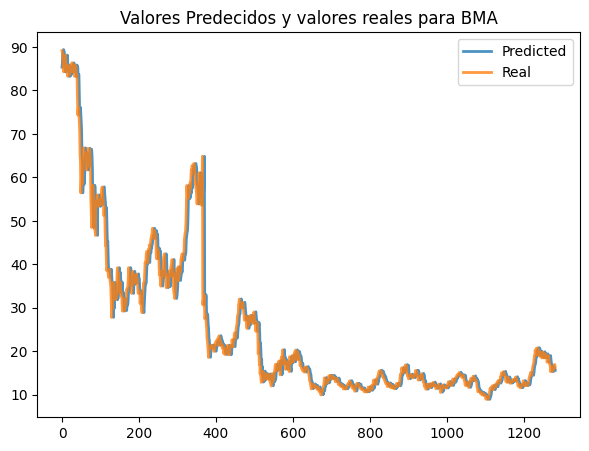

In [29]:
plt.figure(figsize=(7,5))
plt.plot(prediccion, label='Predicted', lw=2, alpha=.8)
plt.plot(y_test, label='Real', lw=2, alpha=.8)
plt.title('Valores Predecidos y valores reales para BMA')
plt.legend()
plt.xticks(rotation=.3)
plt.show()

In [13]:
pred_BCol = pd.DataFrame(prediccion)
pred_BCol.tail(13)

,0
1270,24.233520
1271,23.666770
1272,23.477854
1273,21.894551
1274,21.732622
1275,20.374220
1276,21.183862
1277,20.635105
1278,20.869001
1279,21.354789


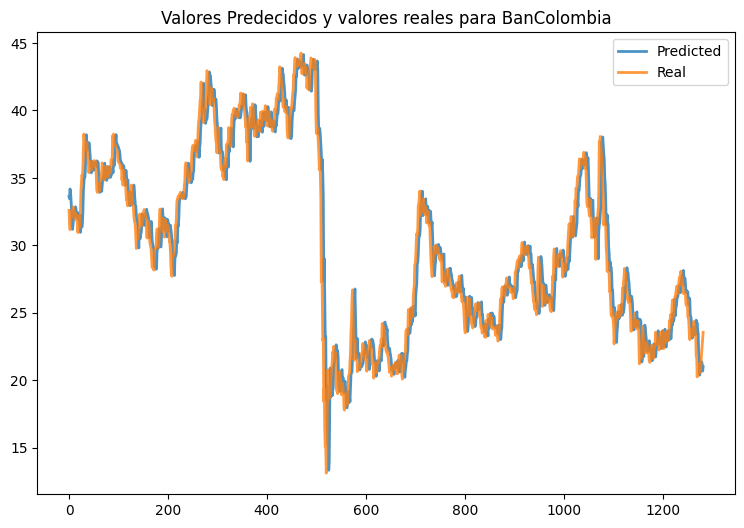

In [16]:
plt.figure(figsize=(9,6))
plt.plot(prediccion, label='Predicted', lw=2, alpha=.8)
plt.plot(y_test, label='Real', lw=2, alpha=.8)
plt.title('Valores Predecidos y valores reales para BanColombia')
plt.legend()
plt.xticks(rotation=.3)
plt.show()